In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

In [2]:
data = pd.read_csv("train.csv")

In [3]:
#data = pd.read_csv("test.csv")

In [4]:
#data.shape

In [5]:
data.columns

Index(['Id', 'name', 'neighborhood_overview', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness

In [6]:
#data.isnull().sum()

<Axes: >

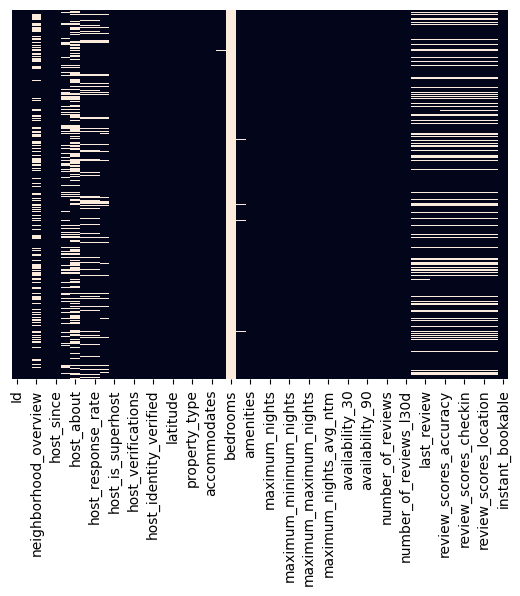

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [8]:
# Fill missing values

In [9]:
#Change neighboardhoood_overview to length of description, so its quantitative instead of qualitative data.
data['description_length'] = data['neighborhood_overview'].str.len()

In [10]:
data['description_length'].fillna(0, inplace=True)

In [11]:
unique_values = data['description_length'].unique()
value_counts = data['description_length'].value_counts()

print("Column: description_length")
print(f"Number of unique values: {len(unique_values)}")
print("Distribution of values:")
print(value_counts)

Column: description_length
Number of unique values: 815
Distribution of values:
0.0       2267
1000.0     414
708.0       26
684.0       26
680.0       25
          ... 
510.0        1
978.0        1
16.0         1
924.0        1
488.0        1
Name: description_length, Length: 815, dtype: int64


In [12]:
data.drop(['neighborhood_overview'], axis=1,inplace=True)

In [13]:
data['host_length_description'] = data['host_about'].str.len()

In [14]:
data['host_length_description'].fillna(0, inplace=True)

In [15]:
data.drop(['host_location'], axis=1,inplace=True)

In [16]:
data.drop(['host_about'], axis=1,inplace=True)

In [17]:
data['host_response_time'].fillna('within a few hours', inplace=True)

In [18]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float)
data['host_response_rate'] = data['host_response_rate'] / 100
data['host_response_rate'].fillna(0, inplace=True)

In [19]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'] / 100
data['host_acceptance_rate'].fillna(0, inplace=True)

In [20]:
data['host_is_superhost'].replace({'t': 1, 'f': 0, None: 0}, inplace=True)

In [21]:
data['host_is_superhost'].fillna(0, inplace=True)

In [22]:
data.drop(['bedrooms'], axis=1,inplace=True)

In [23]:
data['beds'].fillna(1, inplace=True)

In [24]:
data['first_review'] = pd.to_datetime(data['first_review'])
data['last_review'] = pd.to_datetime(data['last_review'])

data['days_used'] = (data['last_review'] - data['first_review']).dt.days

In [25]:
data['days_used'].fillna(0, inplace=True)

In [26]:
data.drop(['first_review'], axis=1,inplace=True)
data.drop(['last_review'], axis=1,inplace=True)

In [27]:
mean_rating = data['review_scores_rating'].mean()
data['review_scores_rating'].fillna(mean_rating, inplace=True)

In [28]:
mean_rating = data['review_scores_accuracy'].mean()
data['review_scores_accuracy'].fillna(mean_rating, inplace=True)

In [29]:
mean_rating = data['review_scores_cleanliness'].mean()
data['review_scores_cleanliness'].fillna(mean_rating, inplace=True)

In [30]:
mean_rating = data['review_scores_checkin'].mean()
data['review_scores_checkin'].fillna(mean_rating, inplace=True)

In [31]:
mean_rating = data['review_scores_communication'].mean()
data['review_scores_communication'].fillna(mean_rating, inplace=True)

In [32]:
mean_rating = data['review_scores_location'].mean()
data['review_scores_location'].fillna(mean_rating, inplace=True)

In [33]:
mean_rating = data['review_scores_value'].mean()
data['review_scores_value'].fillna(mean_rating, inplace=True)

In [34]:
# Handling categorical features

In [35]:
for column_name in data.columns:
    unique_values = data[column_name].unique()
    value_counts = data[column_name].value_counts()
    
    print(f"Column: {column_name}")
    print(f"Number of unique values: {len(unique_values)}")
    print("Distribution of values:")
    print(value_counts)
    print("\n")

Column: Id
Number of unique values: 6547
Distribution of values:
PSJEN    1
4G6JN    1
NWCR7    1
2OQIT    1
WHM3Q    1
        ..
Y2TQQ    1
UFXKT    1
RR4A3    1
FKMJX    1
S2ZQX    1
Name: Id, Length: 6547, dtype: int64


Column: name
Number of unique values: 4614
Distribution of values:
Hotel in San Francisco · ★New · 1 bedroom · 1 bed · 1 bath                119
Rental unit in San Francisco · 1 bedroom · 1 bed · 1 bath                 100
Rental unit in San Francisco · Studio · 1 bed · 1 bath                     45
Rental unit in Oakland · 1 bedroom · 1 bed · 1 bath                        32
Rental unit in San Francisco · ★5.0 · 1 bedroom · 1 bed · 1 bath           31
                                                                         ... 
Guest suite in Millbrae · ★4.75 · 1 bedroom · 2 beds · 1 bath               1
Rental unit in Redwood City · ★4.22 · 1 bedroom · 1 bed · 1 bath            1
Rental unit in San Francisco · ★4.71 · 3 bedrooms · 3 beds · 2.5 baths      1
Cottag

In [36]:
# host_response_time pure categ
# room_type pure categ
# property_type pure categ
# neighbourhood_cleansed pure categ

In [37]:
data['host_since'] = pd.to_datetime(data['host_since'])
reference_date = pd.to_datetime('2024-01-01')
data['days_since_hosting'] = (reference_date - data['host_since']).dt.days


In [38]:
data.drop(['host_since'], axis=1,inplace=True)

In [39]:
data['has_availability'].replace({'t': 1, 'f': 0, None: 0}, inplace=True)

In [40]:
data['host_identity_verified'].replace({'t': 1, 'f': 0, None: 0}, inplace=True)

In [41]:
data['host_has_profile_pic'].replace({'t': 1, 'f': 0, None: 0}, inplace=True)

In [42]:
data['count_host_verifications'] = data['host_verifications'].apply(lambda x: len(x) if pd.notna(x) else 0)

In [43]:
data.drop(['host_verifications'], axis=1,inplace=True)

In [44]:
data['count_amenities'] = data['amenities'].apply(lambda x: len(x) if pd.notna(x) else 0)

In [45]:
def detect_wifi(df):
    wifi_keywords = ['wifi', 'internet', 'broadband', 'ethernet']
    pattern = '|'.join(wifi_keywords)
    df['has_wifi'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_wifi(data)

In [46]:
def detect_self_check_in(df):
    wifi_keywords = ['Self check-in', 'self', 'check-in', 'check in']
    pattern = '|'.join(wifi_keywords)
    df['has_self_check_in'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_self_check_in(data)

In [47]:
def detect_tv(df):
    wifi_keywords = ['TV']
    pattern = '|'.join(wifi_keywords)
    df['has_tv'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_tv(data)

In [48]:
def detect_smoke(df):
    wifi_keywords = ['Smoke alarm', 'smoke', 'alarm', 'Carbon monoxide alarm']
    pattern = '|'.join(wifi_keywords)
    df['has_smoke'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_smoke(data)

In [49]:
def detect_kitchen(df):
    wifi_keywords = ['Kitchen']
    pattern = '|'.join(wifi_keywords)
    df['has_kitchen'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_kitchen(data)

In [50]:
def detect_free_parking(df):
    wifi_keywords = ['parking', 'garage', 'Free street parking']
    pattern = '|'.join(wifi_keywords)
    df['has_parking'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_free_parking(data)

In [51]:
def detect_hangers(df):
    wifi_keywords = ['Hangers']
    pattern = '|'.join(wifi_keywords)
    df['has_hangers'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_hangers(data)

In [52]:
def detect_essentials(df):
    wifi_keywords = ['Essentials']
    pattern = '|'.join(wifi_keywords)
    df['has_essentials'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_essentials(data)

In [53]:
def detect_hair_dryer(df):
    wifi_keywords = ['Hair dryer', 'hair']
    pattern = '|'.join(wifi_keywords)
    df['has_hair_dryer'] = df['amenities'].str.contains(pattern, case=False, na=False, regex=True).astype(int)

    return df

data = detect_hair_dryer(data)

In [54]:
def detect_hot_water(df):
    keyword = 'Hot water'
    df['has_hot_water'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_iron(df):
    keyword = 'Iron'
    df['has_iron'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_shampoo(df):
    keyword = 'Shampoo'
    df['has_shampoo'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_fire_extinguisher(df):
    keyword = 'Fire extinguisher'
    df['has_fire_extinguisher'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_microwave(df):
    keyword = 'Microwave'
    df['has_microwave'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_dishes_and_silverware(df):
    keyword = 'Dishes and silverware'
    df['has_dishes_and_silverware'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_bed_linens(df):
    keyword = 'Bed linens'
    df['has_bed_linens'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_refrigerator(df):
    keyword = 'Refrigerator'
    df['has_refrigerator'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_workspace(df):
    keyword = 'workspace'
    df['has_workspace'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df

def detect_cooking_basics(df):
    keyword = 'Cooking basics'
    df['has_cooking_basics'] = df['amenities'].str.contains(keyword, case=False, na=False, regex=True).astype(int)
    return df


In [55]:
data = detect_hot_water(data)
data = detect_iron(data)
data = detect_shampoo(data)
data = detect_fire_extinguisher(data)
data = detect_microwave(data)
data = detect_dishes_and_silverware(data)
data = detect_bed_linens(data)
data = detect_refrigerator(data)
data = detect_workspace(data)
data = detect_cooking_basics(data)

In [56]:
data.drop(['amenities'], axis=1,inplace=True)

In [57]:
data = data.dropna(subset=['days_since_hosting'])

In [58]:
data['bathrooms_text'].unique()

array(['1 private bath', '1 bath', '3.5 shared baths', '1 shared bath',
       '2 baths', '4.5 baths', '5 shared baths', '3 baths', '2.5 baths',
       '5 baths', '3.5 baths', '2 shared baths', '1.5 shared baths',
       '0 baths', '1.5 baths', '3 shared baths', '4 baths',
       '0 shared baths', '6 baths', '6.5 baths', 'Shared half-bath',
       'Half-bath', nan, '4 shared baths', '5.5 baths', '6 shared baths',
       'Private half-bath', '2.5 shared baths', '8.5 baths', '8 baths',
       '7 baths', '10 baths'], dtype=object)

In [59]:
def extract_bath_count(row):
    if pd.notna(row['bathrooms_text']):
        numeric_part = ''.join(filter(str.isdigit, row['bathrooms_text']))
        if numeric_part:
            return int(numeric_part)
    return 0  # If 'bathrooms_text' is null or does not contain numeric information, set 'bath_count' to 0

# Apply the extract_bath_count function to create the 'bath_count' column
data['bath_count'] = data.apply(extract_bath_count, axis=1)

In [60]:
data.isnull().sum()

Id                    0
name                  0
host_id               0
host_response_time    0
host_response_rate    0
                     ..
has_bed_linens        0
has_refrigerator      0
has_workspace         0
has_cooking_basics    0
bath_count            0
Length: 68, dtype: int64

In [61]:
data.drop(['bathrooms_text'], axis=1,inplace=True)

In [62]:
columns_to_exclude = [
    'host_response_time',
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'name',
    'id'
]

# Create a copy of the DataFrame
data_copy = data.copy()

# Iterate through columns and convert numeric columns to integers
for column in data.columns:
    if column not in columns_to_exclude:
        data_copy[column] = pd.to_numeric(data_copy[column], errors='coerce').fillna(0).astype(int)


In [63]:
data.dtypes

Id                     object
name                   object
host_id                 int64
host_response_time     object
host_response_rate    float64
                       ...   
has_bed_linens          int64
has_refrigerator        int64
has_workspace           int64
has_cooking_basics      int64
bath_count              int64
Length: 67, dtype: object

In [64]:
data['instant_bookable'].replace({'t': 1, 'f': 0, None: 0}, inplace=True)

In [65]:
#data['price'] = data['price'].astype(int)

<Axes: >

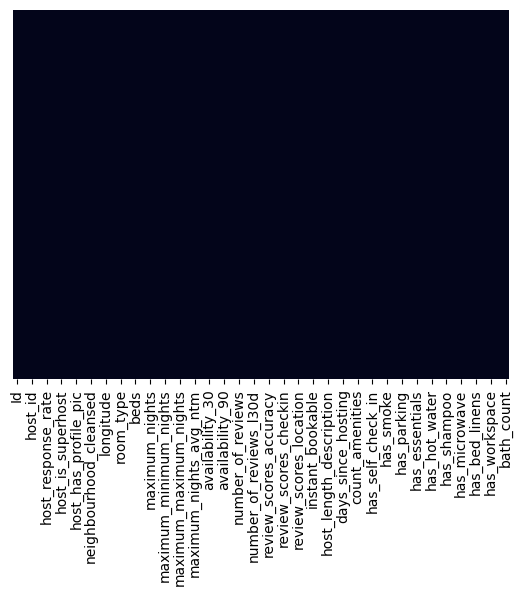

In [66]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [67]:
data.to_csv('train_clean.csv', index=False)

In [68]:
#data.to_csv('test_clean.csv', index=False)